# Set the Random Seed

In [1]:
import numpy as np
np.random.seed(101)

# Introduction and Visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


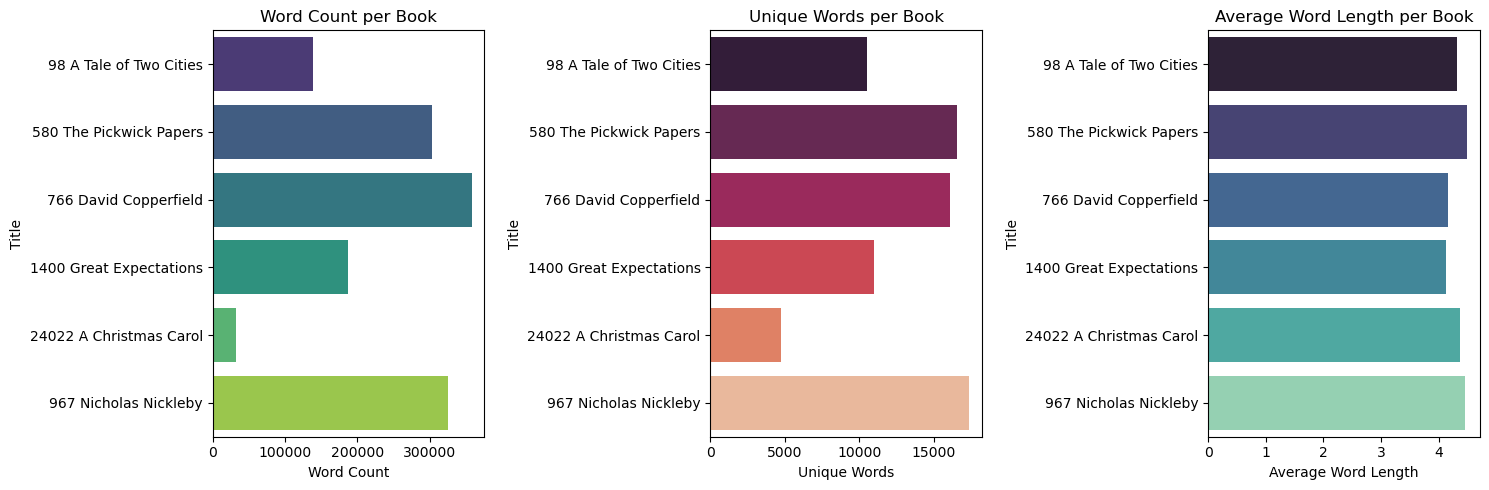

In [2]:
import nltk
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
# Download stopwords from NLTK
nltk.download('stopwords') 

# Preprocessing functions
def preprocess_for_word_count(text):
    # Tokenize the text for word count
    return text.split()

def preprocess_for_unique_words(text, additional_stopwords=set()):
    """
    Lowercase the text, remove punctuation, and filter out stopwords and non-alphabetic words.
    Return a set of unique words.
    """
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    sw = set(stopwords.words('english')) | additional_stopwords
    words = text.split()
    return {word for word in words if word not in sw and word.isalpha()}

def preprocess_for_avg_word_length(text):
    """
    Remove punctuation from the text and calculate the average word length.
    Only consider alphabetic words.
    """
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [word for word in text.split() if word.isalpha()]
    return sum(len(word) for word in words) / len(words) if words else 0

# Define a set of additional stopwords specific to the text being analyzed
stopwords_set = {'mr', 'mrs', 'miss', 'said', '’', '“', '”', 'project', 'gutenberg'}

# File paths for the six novels
file_paths = [
    './6books/pg98_A_Tale_of_Two_Cities.txt', 
    './6books/pg580_The_Pickwick_Papers.txt', 
    './6books/pg766_David_Copperfield.txt', 
    './6books/pg1400_Great_Expectations.txt', 
    './6books/pg24022_A_Christmas_Carol.txt',
    './6books/pg967_Nicholas_Nickleby.txt'
]

# Initialize a dictionary to store statistics for each book
books_stats = {
    'Title': [],
    'Word Count': [],
    'Unique Words': [],
    'Average Word Length': []
}

# Process each book
for path in file_paths:
    with open(path, 'r', encoding='utf-8') as file:
        content = file.read()
        title = os.path.basename(path).replace(".txt", "").replace("pg", "").replace("_", " ")

        # Calculate and append various statistics for each book
        word_count = len(preprocess_for_word_count(content))
        unique_words = len(preprocess_for_unique_words(content, stopwords_set))
        avg_word_length = preprocess_for_avg_word_length(content)

        # Append to the stats dictionary
        books_stats['Title'].append(title)
        books_stats['Word Count'].append(word_count)
        books_stats['Unique Words'].append(unique_words)
        books_stats['Average Word Length'].append(avg_word_length)

# Creating a DataFrame for visualization
df = pd.DataFrame(books_stats)

# Visualizing the data
plt.figure(figsize=(15, 5))

# Word Count per Book
plt.subplot(1, 3, 1)
sns.barplot(x='Word Count', y='Title', data=df, palette="viridis")
plt.title('Word Count per Book')

# Unique Words per Book
plt.subplot(1, 3, 2)
sns.barplot(x='Unique Words', y='Title', data=df, palette="rocket")
plt.title('Unique Words per Book')

# Average Word Length per Book
plt.subplot(1, 3, 3)
sns.barplot(x='Average Word Length', y='Title', data=df, palette="mako")
plt.title('Average Word Length per Book')
# Adjust the layout
plt.tight_layout()
# Display the plots
plt.show()

In [3]:
df

,Title,Word Count,Unique Words,Average Word Length
0,98 A Tale of Two Cities,138965,10538,4.319830
1,580 The Pickwick Papers,303110,16529,4.487935
2,766 David Copperfield,357861,16096,4.161965
3,1400 Great Expectations,187517,10992,4.114937
4,24022 A Christmas Carol,32430,4717,4.361079
5,967 Nicholas Nickleby,325340,17371,4.446091


# Bi-grams

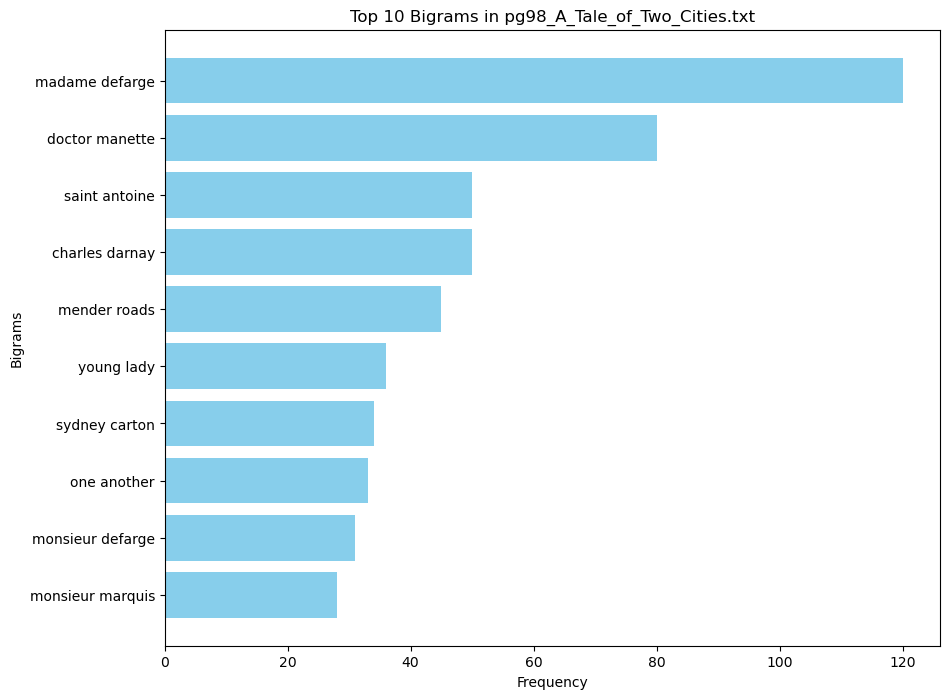

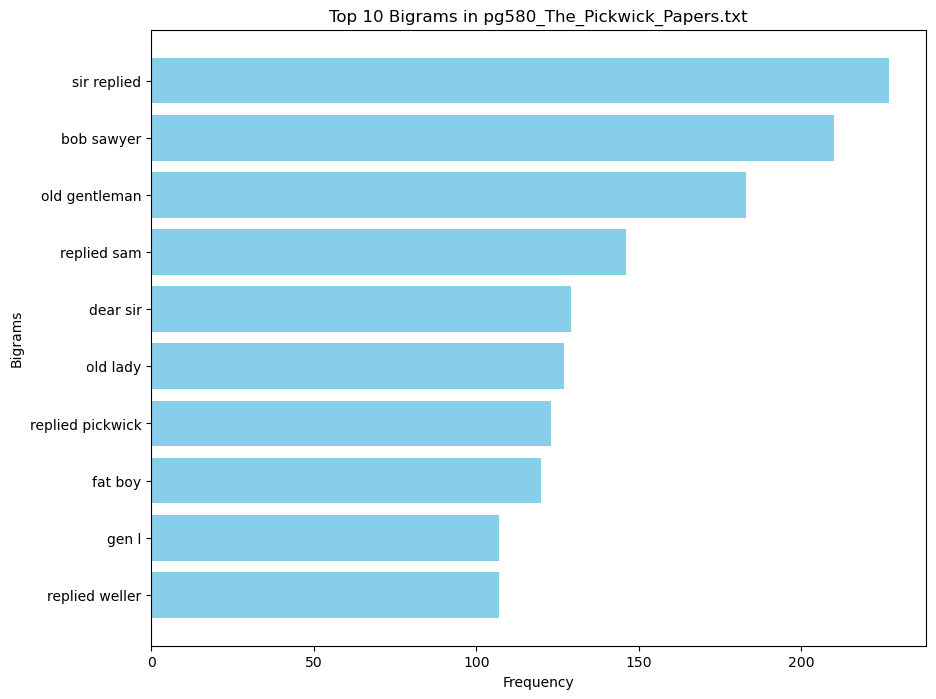

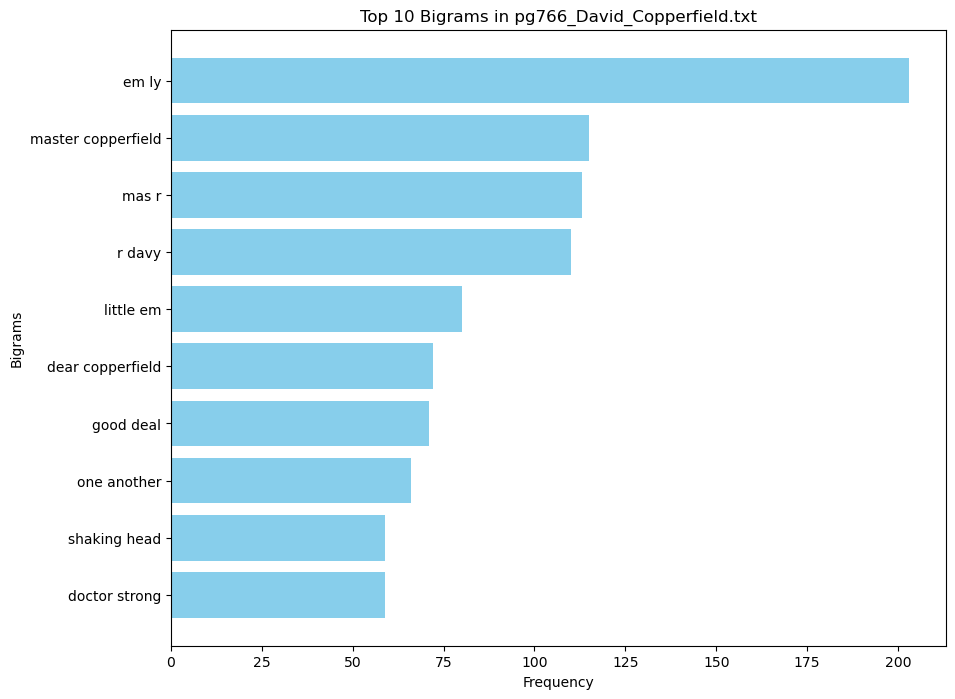

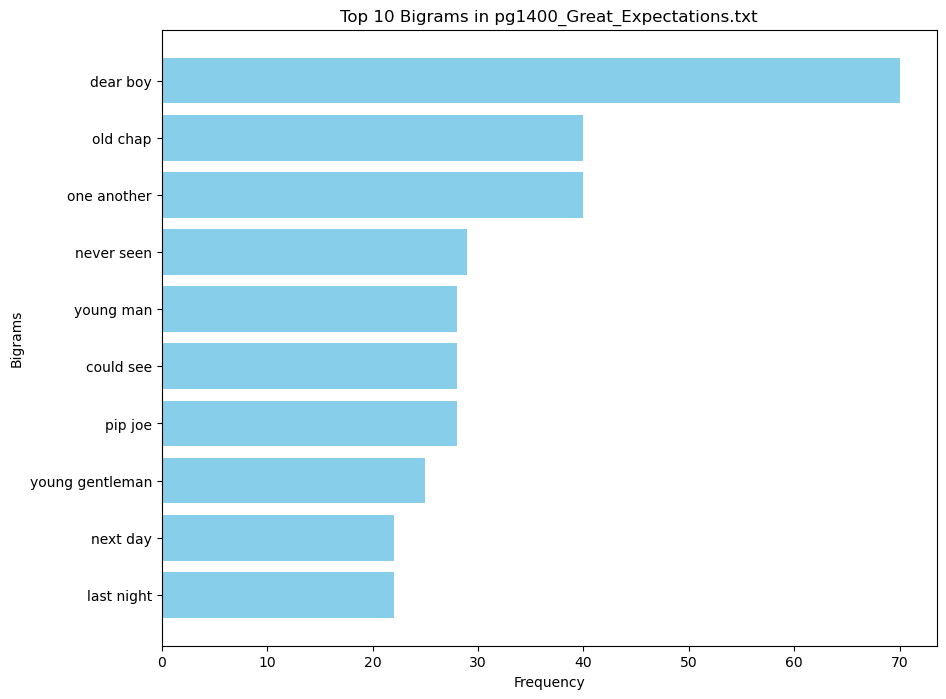

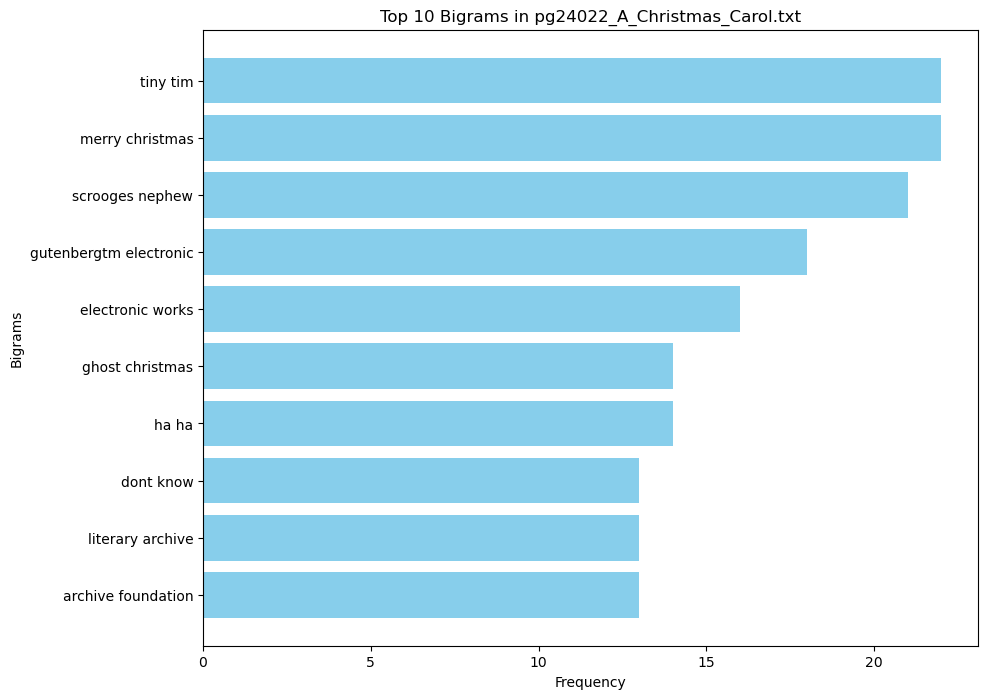

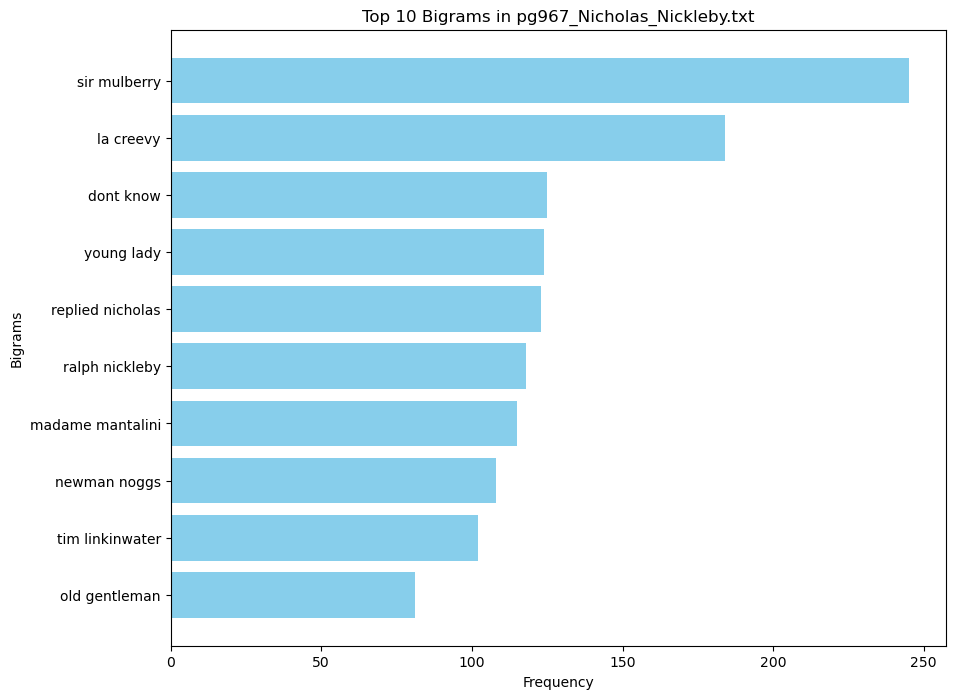

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk import bigrams, word_tokenize
from nltk.corpus import stopwords
import string

file_paths = [
    './6books/pg98_A_Tale_of_Two_Cities.txt', 
    './6books/pg580_The_Pickwick_Papers.txt', 
    './6books/pg766_David_Copperfield.txt', 
    './6books/pg1400_Great_Expectations.txt', 
    './6books/pg24022_A_Christmas_Carol.txt',
    './6books/pg967_Nicholas_Nickleby.txt'
]

def preprocess_text_for_bigrams(text):
    """
    Preprocess the text for bigram analysis.
    Convert to lowercase, remove punctuation, tokenize, and remove stopwords and non-alphabetic words.
    """
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Define custom stopwords including specific words to be excluded
    custom_stopwords = set(stopwords.words('english')) | {'mr', 'mrs', 'miss', 'said', '’', '“', '”', 'project', 'gutenberg'}
    # Remove stopwords and custom words
    tokens = [word for word in tokens if word not in custom_stopwords and word.isalpha()]
    return tokens


def generate_bigrams(tokens):
    """
    Generate bigrams from a list of tokens.
    """
    return list(bigrams(tokens))


def plot_top_bigrams(bigrams_data, title):
    """
    Plot the top 10 bigrams in a horizontal bar chart.
    """
    bigrams, counts = zip(*bigrams_data)
    bigrams = [' '.join(bigram) for bigram in bigrams]
    # display the plots
    plt.figure(figsize=(10, 8))
    plt.barh(bigrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.title(f'Top 10 Bigrams in {title}')
    plt.gca().invert_yaxis()  # Invert y-axis so the highest bar is at the top
    plt.show()

# Read and preprocess texts, then generate bigrams
texts = {path: preprocess_text_for_bigrams(open(path, 'r', encoding='utf-8').read()) for path in file_paths}
bigrams_texts = {path: generate_bigrams(text) for path, text in texts.items()}

# Calculate and plot the top 10 bigrams for each text
for path, bigrams in bigrams_texts.items():
    title = path.split('/')[-1]  # # Extract the filename from the file path
    top_10_bigrams = Counter(bigrams).most_common(10)
    #print ("top 10 bigrams: ", top_10_bigrams)
    plot_top_bigrams(top_10_bigrams, title)


# TF, IDF, TF-IDF

In [5]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define custom stopwords
custom_stopwords = set(stopwords.words('english')) | {'mr', 'mrs', 'miss', 'said', '’', '“', '”', 'project', 'gutenberg'}

def preprocess_text(text, additional_stopwords=set()):
    """
    Preprocess the given text:
    - Convert to lowercase
    - Remove punctuation
    - Tokenize
    - Remove stopwords
    - Join tokens back into a single string
    """
    # Convert to lowercase and remove punctuation
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Combine standard and custom stopwords
    all_stopwords = set(stopwords.words('english')) | additional_stopwords
    # Remove stopwords
    tokens = [word for word in tokens if word not in all_stopwords and word.isalpha()]
    
    return ' '.join(tokens)

file_paths = ['./6books/pg98_A_Tale_of_Two_Cities.txt', 
              './6books/pg580_The_Pickwick_Papers.txt', 
              './6books/pg766_David_Copperfield.txt', 
              './6books/pg1400_Great_Expectations.txt', 
              './6books/pg24022_A_Christmas_Carol.txt',
              './6books/pg967_Nicholas_Nickleby.txt']

# Preprocess texts and store in a dictionary
texts = {os.path.basename(path): preprocess_text(open(path, 'r', encoding='utf-8').read(), custom_stopwords) for path in file_paths}

# Function to compute TF for a given text
def compute_tf(text):
    vectorizer = CountVectorizer(stop_words='english')
    tf_matrix = vectorizer.fit_transform([text])
    sum_words = tf_matrix.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

# Compute TF for each text
tf_results = {title: compute_tf(text) for title, text in texts.items()}

# Fit the TfidfVectorizer on the entire corpus
vectorizer_tfidf = TfidfVectorizer(use_idf=True, stop_words='english')
vectorizer_tfidf.fit(list(texts.values()))

# Function to compute TF-IDF for a given text using the fitted vectorizer
def compute_tfidf(text, vectorizer):
    tfidf_matrix = vectorizer.transform([text])
    sum_words = tfidf_matrix.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

# Compute TF-IDF for each text using the fitted vectorizer
tfidf_results = {title: compute_tfidf(text, vectorizer_tfidf) for title, text in texts.items()}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
tf_results

{'pg98_A_Tale_of_Two_Cities.txt': [('lorry', 366),
  ('defarge', 300),
  ('man', 294),
  ('little', 265),
  ('time', 260),
  ('hand', 247),
  ('know', 230),
  ('doctor', 222),
  ('good', 209),
  ('like', 199),
  ('father', 194),
  ('looked', 193),
  ('long', 192),
  ('madame', 192),
  ('face', 187),
  ('old', 186),
  ('night', 183),
  ('way', 180),
  ('day', 178),
  ('head', 173)],
 'pg580_The_Pickwick_Papers.txt': [('pickwick', 2358),
  ('sir', 1478),
  ('sam', 1196),
  ('replied', 1004),
  ('weller', 987),
  ('man', 968),
  ('old', 899),
  ('gentleman', 711),
  ('little', 645),
  ('winkle', 582),
  ('time', 498),
  ('great', 466),
  ('say', 433),
  ('know', 429),
  ('lady', 410),
  ('dear', 391),
  ('head', 390),
  ('good', 377),
  ('young', 376),
  ('door', 361)],
 'pg766_David_Copperfield.txt': [('little', 1092),
  ('micawber', 856),
  ('aunt', 818),
  ('know', 813),
  ('peggotty', 779),
  ('time', 641),
  ('old', 630),
  ('like', 606),
  ('say', 600),
  ('think', 582),
  ('dear', 

In [7]:
tfidf_results

{'pg98_A_Tale_of_Two_Cities.txt': [('lorry', 0.3807324698879857),
  ('defarge', 0.3120757949901522),
  ('manette', 0.1685209292946822),
  ('pross', 0.16748067664471503),
  ('madame', 0.16378023436675765),
  ('carton', 0.16123916074491199),
  ('darnay', 0.15187688689520742),
  ('man', 0.1357596353311052),
  ('lucie', 0.13419259184576546),
  ('cruncher', 0.12483031799606088),
  ('little', 0.12236837878483971),
  ('monsieur', 0.12170956004615938),
  ('time', 0.1200595414492767),
  ('doctor', 0.11831473041200699),
  ('hand', 0.11405656437681286),
  ('monseigneur', 0.1123472861964548),
  ('stryver', 0.1123472861964548),
  ('know', 0.10620651743589862),
  ('good', 0.09650940062653396),
  ('tellson', 0.09466299114701283)],
 'pg580_The_Pickwick_Papers.txt': [('pickwick', 0.6107132108326576),
  ('sam', 0.37774894911854073),
  ('weller', 0.31173763610367866),
  ('sir', 0.20721969052072645),
  ('winkle', 0.18382097691219956),
  ('replied', 0.1407635786757844),
  ('man', 0.13571627904199132),
  ('

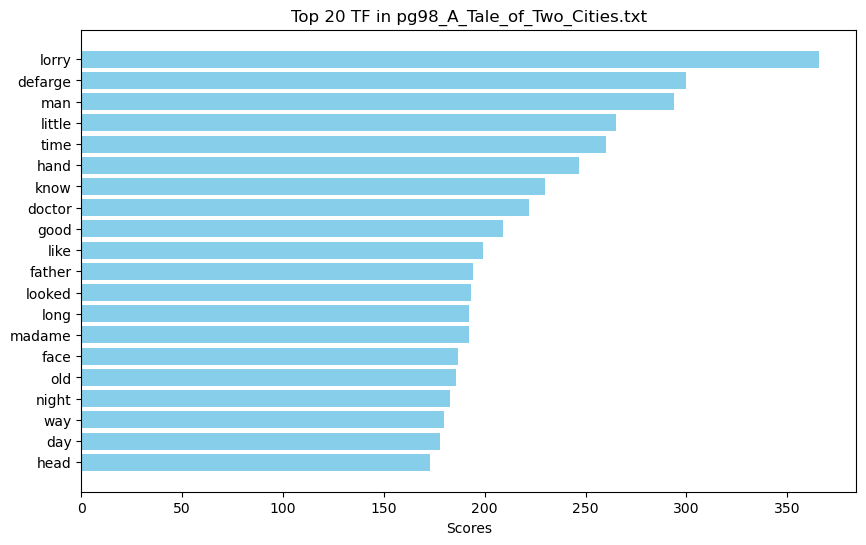

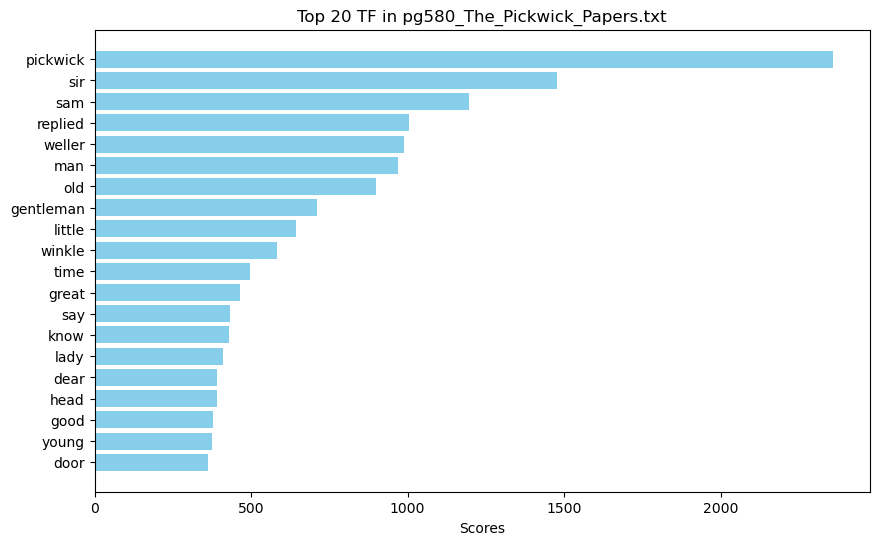

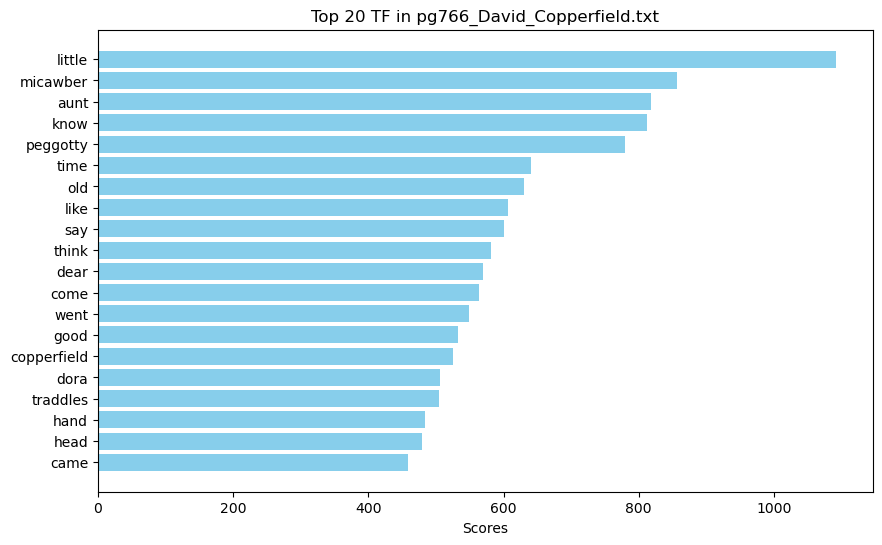

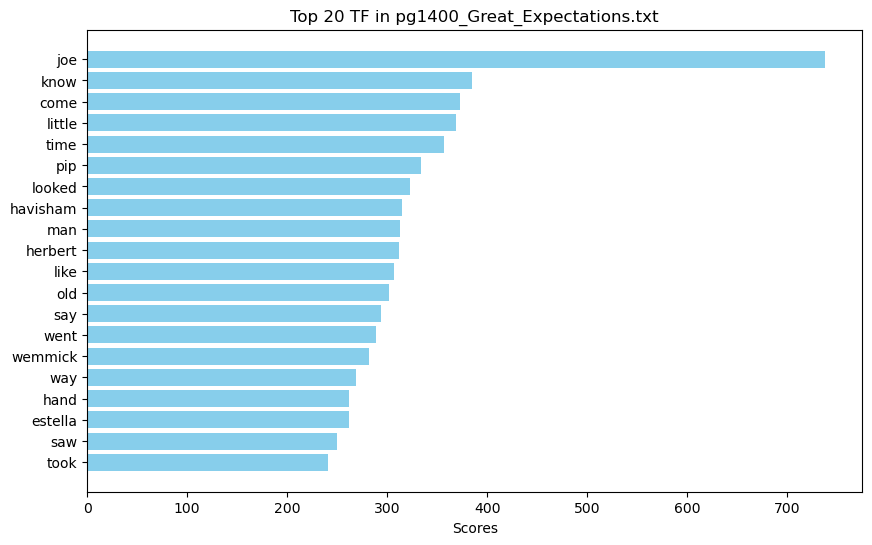

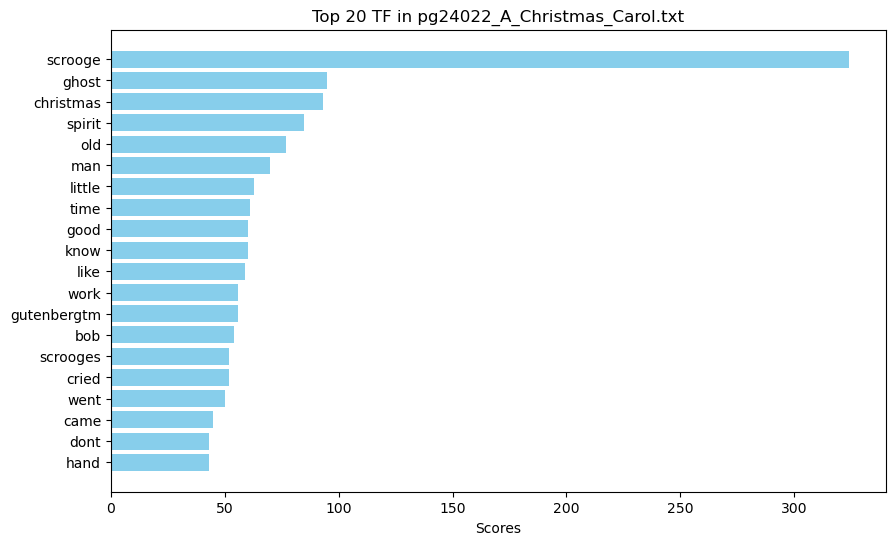

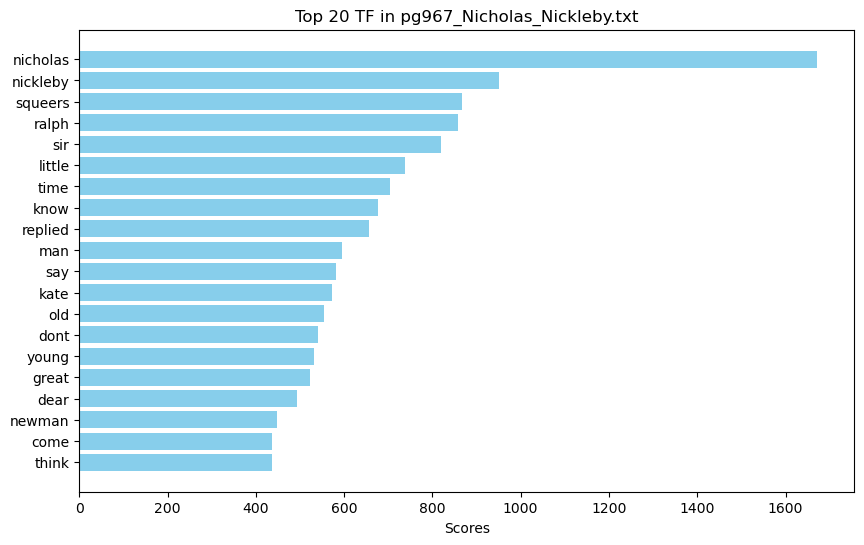

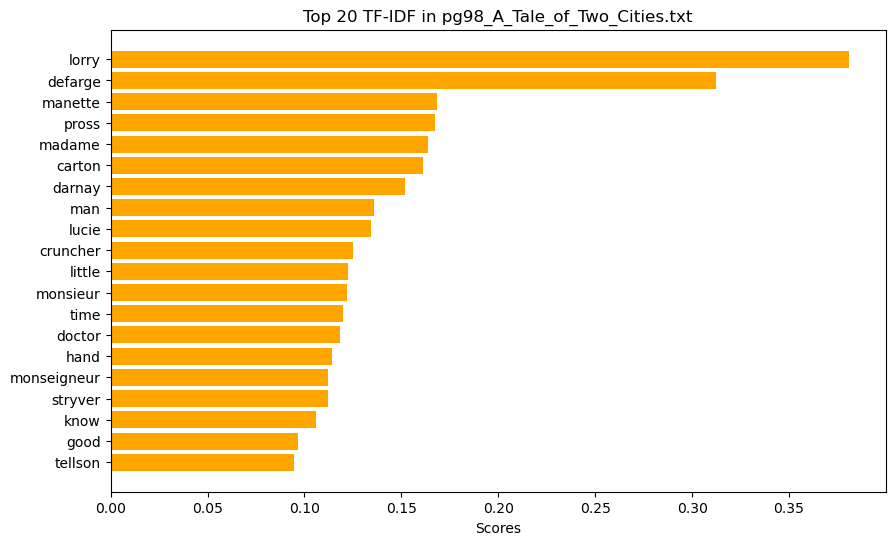

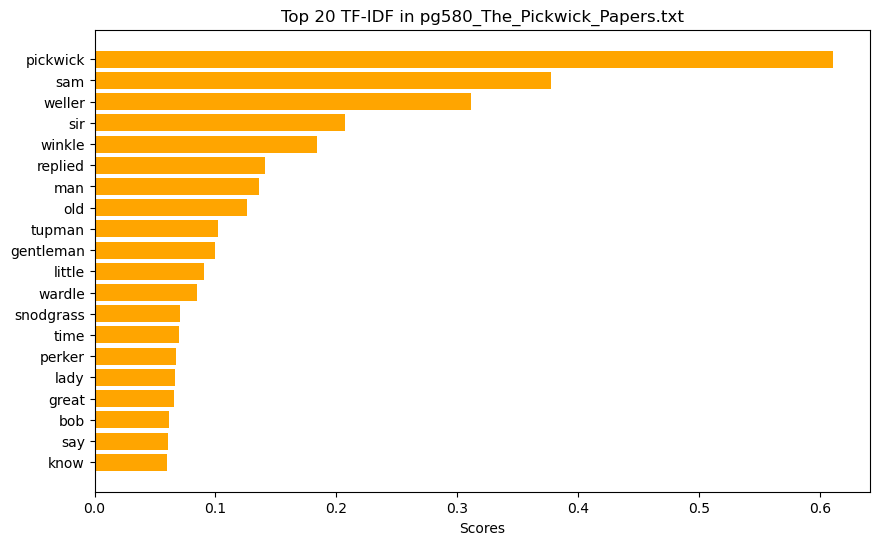

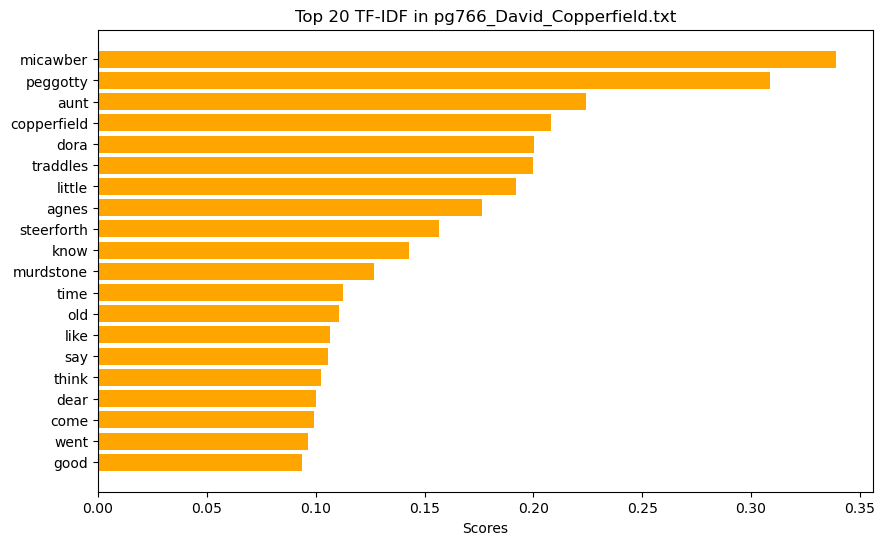

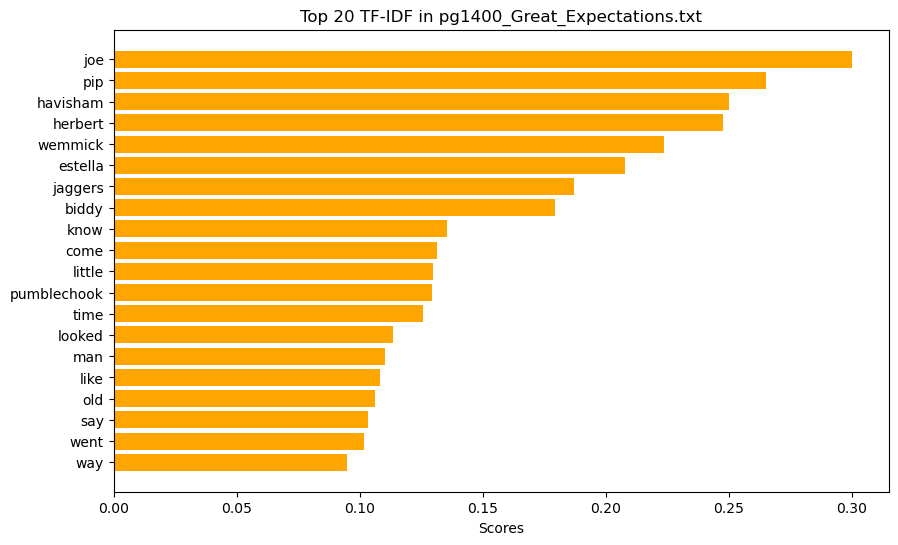

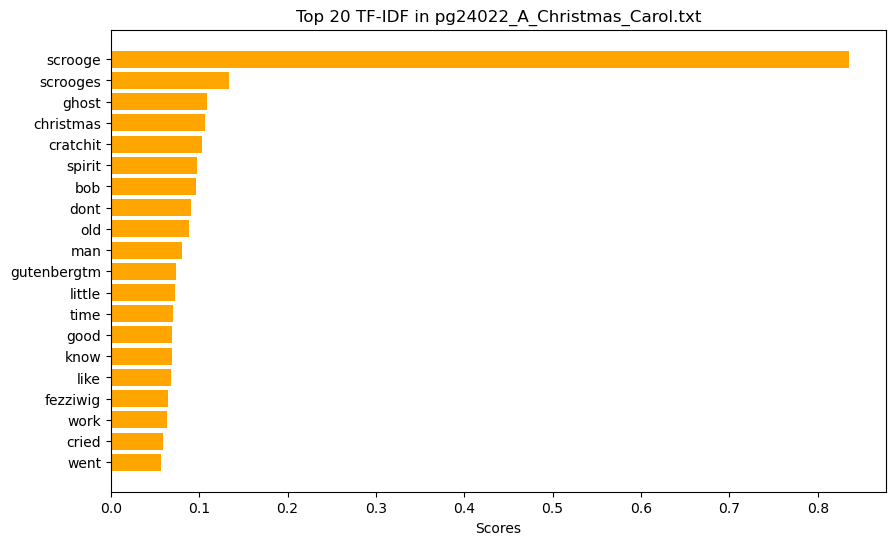

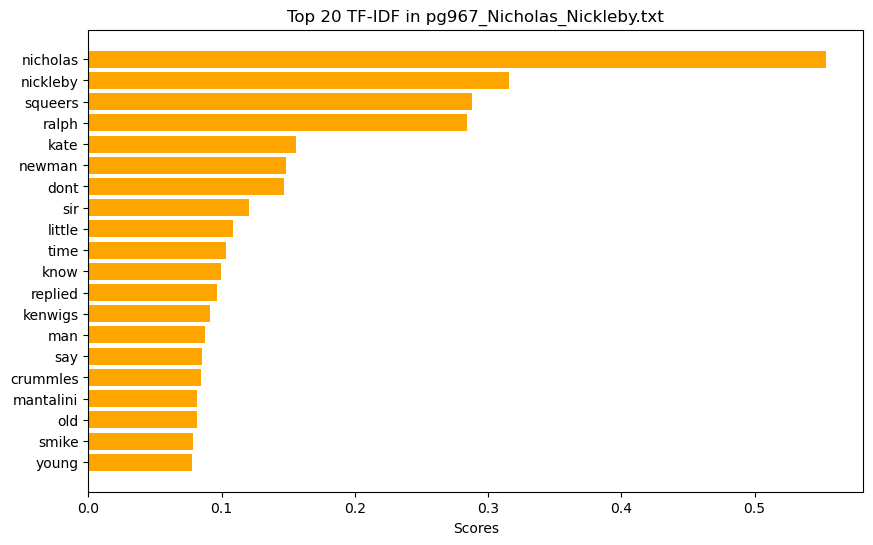

In [8]:
def plot_metrics(results, title, metric_name, color):
    for book_title, terms in results.items():
        terms, scores = zip(*terms)
        plt.figure(figsize=(10, 6))
        plt.barh(terms, scores, color=color)
        plt.xlabel('Scores')
        plt.title(f'Top 20 {metric_name} in {book_title}')
        plt.gca().invert_yaxis()
        plt.show()

# Plot TF
plot_metrics(tf_results, 'Book Title', 'TF', color='skyblue')

# Plot TF-IDF
plot_metrics(tfidf_results, 'Book Title', 'TF-IDF', color='orange')


# NRC Emotion Lexicon

In [9]:
def load_nrc_lexicon(filename):
    """
    Load the NRC Emotion Lexicon from a file.
    Each line in the lexicon file contains a word, an emotion, and an association flag (0 or 1).
    """
    lexicon = {}
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            word, emotion, association = line.strip().split('\t')
            if word not in lexicon:
                lexicon[word] = {}
            lexicon[word][emotion] = int(association)
    return lexicon

# Load the NRC Emotion Lexicon
emotion_lexicon = load_nrc_lexicon('./NRC-Emotion-Lexicon/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def analyze_emotions(text, lexicon):
    """
    Analyze the emotions in a given text using the provided emotion lexicon.
    Counts the occurrences of each emotion.
    """
    # Initialize a dictionary to count each emotion
    emotions = {e: 0 for e in list(lexicon.values())[0].keys()}
    # Tokenize the text
    tokens = word_tokenize(text)

    # Count each emotion in the text
    for word in tokens:
        if word in lexicon:
            for emotion, value in lexicon[word].items():
                if value == 1:
                    emotions[emotion] += 1

    return emotions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Analyze emotions for each text
emotion_results = {title: analyze_emotions(text, emotion_lexicon) for title, text in texts.items()}

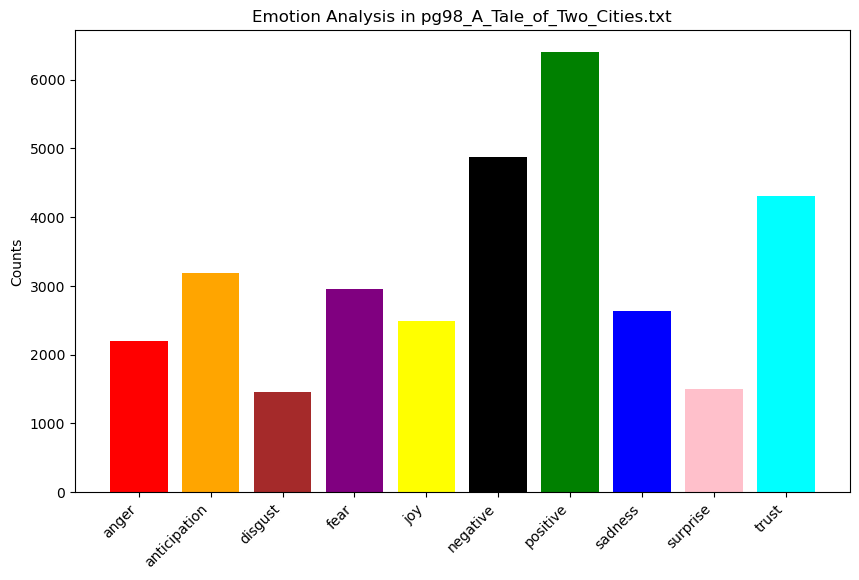

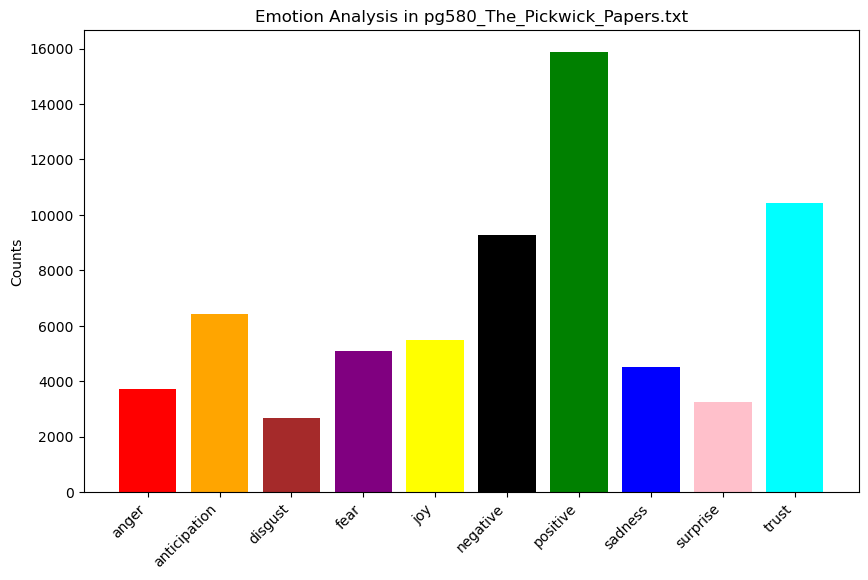

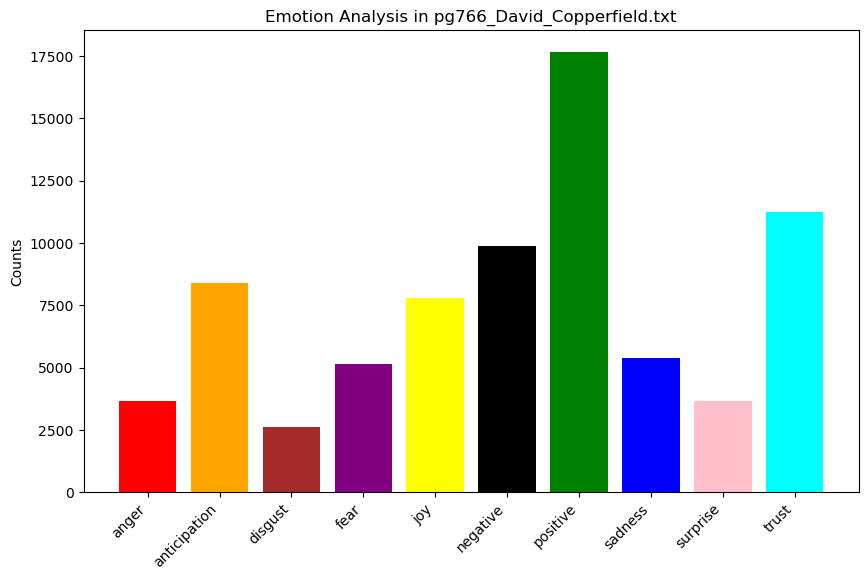

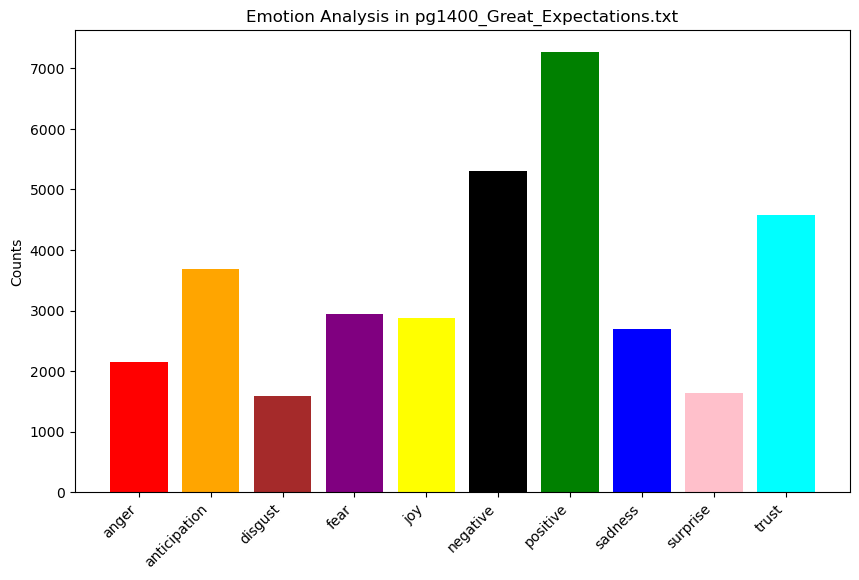

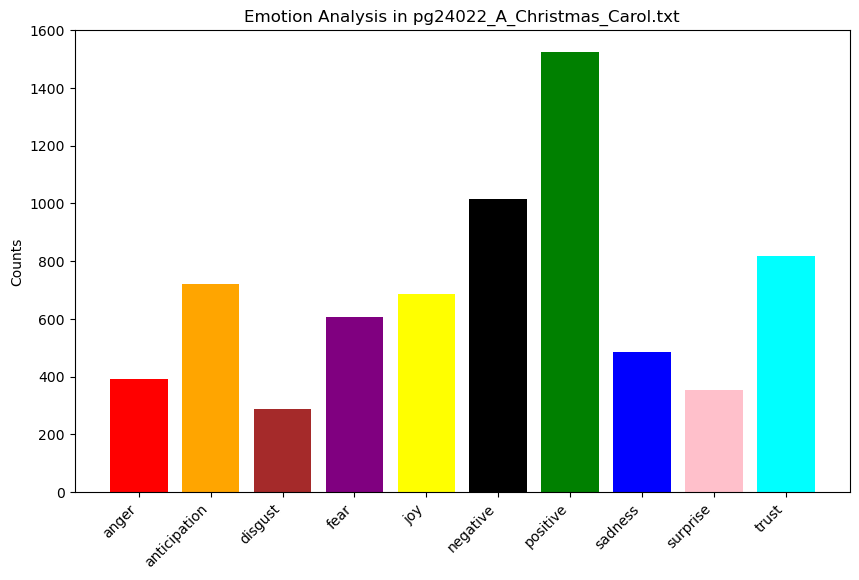

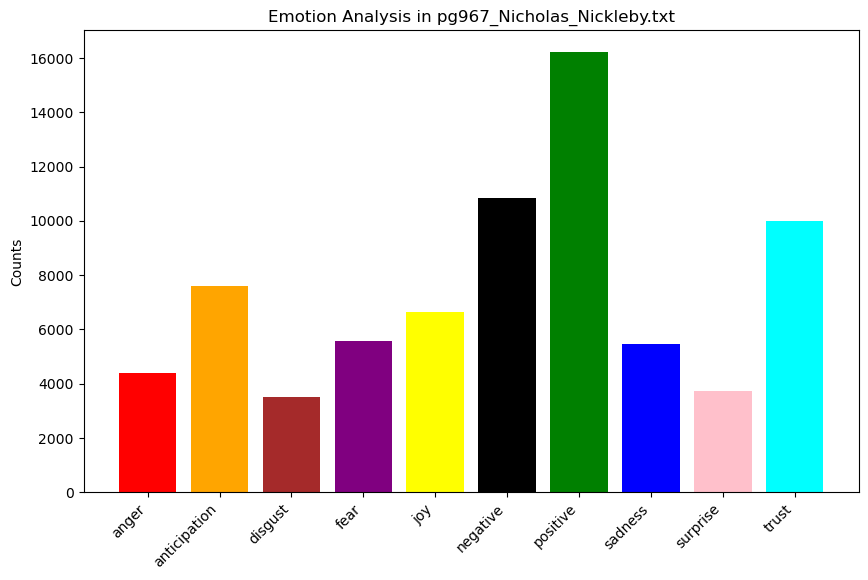

In [11]:
import matplotlib.pyplot as plt

# Color mapping for each emotion
emotion_colors = {
    'anger': 'red',
    'anticipation': 'orange',
    'disgust': 'brown',
    'fear': 'purple',
    'joy': 'yellow',
    'negative': 'black',
    'positive': 'green',
    'sadness': 'blue',
    'surprise': 'pink',
    'trust': 'cyan'
}

def plot_emotions(emotions, title):
    """
    Plot the emotions data as a bar chart.
    """
    # Assign colors to each emotion
    colors = [emotion_colors[emotion] for emotion in emotions.keys()]
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.bar(emotions.keys(), emotions.values(), color=colors)  # Create a bar chart
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.ylabel('Counts')  # Y-axis label
    plt.title(f'Emotion Analysis in {title}')  # Chart title
    plt.show()  # Display the plot

# Plot the emotions for each text
for title, emotion_data in emotion_results.items():
    plot_emotions(emotion_data, title)

In [12]:
emotion_results

{'pg98_A_Tale_of_Two_Cities.txt': {'anger': 2193,
  'anticipation': 3188,
  'disgust': 1459,
  'fear': 2957,
  'joy': 2485,
  'negative': 4872,
  'positive': 6401,
  'sadness': 2632,
  'surprise': 1498,
  'trust': 4305},
 'pg580_The_Pickwick_Papers.txt': {'anger': 3717,
  'anticipation': 6417,
  'disgust': 2678,
  'fear': 5087,
  'joy': 5473,
  'negative': 9274,
  'positive': 15873,
  'sadness': 4506,
  'surprise': 3255,
  'trust': 10418},
 'pg766_David_Copperfield.txt': {'anger': 3644,
  'anticipation': 8385,
  'disgust': 2608,
  'fear': 5127,
  'joy': 7812,
  'negative': 9877,
  'positive': 17661,
  'sadness': 5370,
  'surprise': 3658,
  'trust': 11225},
 'pg1400_Great_Expectations.txt': {'anger': 2150,
  'anticipation': 3691,
  'disgust': 1585,
  'fear': 2938,
  'joy': 2873,
  'negative': 5311,
  'positive': 7268,
  'sadness': 2699,
  'surprise': 1632,
  'trust': 4580},
 'pg24022_A_Christmas_Carol.txt': {'anger': 393,
  'anticipation': 721,
  'disgust': 289,
  'fear': 605,
  'joy': 

# LDA (Topic Modeling)

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download necessary NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Define a set of custom stopwords in addition to the standard English stopwords
custom_stopwords = set(stopwords.words('english')) | {'mr', 'mrs', 'miss', 'said', 'project', 'gutenberg'}

def preprocess_text(text, additional_stopwords=set()):
    """
    Preprocess a given text:
    - Convert to lowercase
    - Remove punctuation
    - Tokenize
    - Remove stopwords
    - Combine tokens back into a string
    """
    text = text.lower()  # Lowercase the text
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    # Combine standard and custom stopwords
    all_stopwords = set(stopwords.words('english')) | additional_stopwords
    # Remove stopwords and non-alphabetic words
    tokens = [word for word in tokens if word not in all_stopwords and word.isalpha()]
    return ' '.join(tokens)  # Return the preprocessed text as a string

# Paths to the text files
file_paths = [
    './6books/pg98_A_Tale_of_Two_Cities.txt', 
    './6books/pg580_The_Pickwick_Papers.txt', 
    './6books/pg766_David_Copperfield.txt', 
    './6books/pg1400_Great_Expectations.txt', 
    './6books/pg24022_A_Christmas_Carol.txt',
    './6books/pg967_Nicholas_Nickleby.txt'
]

# Preprocess the texts and store them in a list
texts = [preprocess_text(open(path, 'r', encoding='utf-8').read(), custom_stopwords) for path in file_paths]

# Initialize the CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
tf_matrix = vectorizer.fit_transform(texts)  # Apply the vectorizer to the preprocessed texts

# Set the number of topics for LDA
num_components = 6
# Initialize the Latent Dirichlet Allocation model
lda_model = LatentDirichletAllocation(n_components=num_components, random_state=17)
# Fit the LDA model to the term frequency matrix
lda_matrix = lda_model.fit_transform(tf_matrix)

# Retrieve the feature (word) names
words = vectorizer.get_feature_names_out()
num_top_words = 10  # Number of top words to display for each topic

# Print the top words for each topic
for i, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[-num_top_words:][::-1]  # Indices of the top words in the topic
    top_words = [words[j] for j in top_word_indices]  # Retrieve the top words
    print(f"Topic {i}: {', '.join(top_words)}")  # Print the topic and its top words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: pickwick, sir, sam, replied, weller, man, old, gentleman, little, winkle
Topic 1: bearers, swing, woods, repentance, observant, sailing, cheery, speckled, terrors, negative
Topic 2: lorry, defarge, man, little, time, hand, know, doctor, good, like
Topic 3: nicholas, nickleby, squeers, ralph, sir, little, time, know, replied, man
Topic 4: little, micawber, aunt, know, peggotty, time, old, like, say, think
Topic 5: joe, know, come, little, time, pip, looked, man, havisham, like


# Lexical Diversity Richness

In [14]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data for tokenization
nltk.download('punkt')

def lexical_richness(text):
    """
    Calculate the lexical richness of the text.
    Lexical richness is defined as the ratio of unique tokens (types) to the total number of tokens.
    """
    tokens = word_tokenize(text)  # Tokenize the text
    types = set(tokens)  # Get the set of unique tokens
    return len(types) / len(tokens)  # Calculate the lexical richness

def preprocess_text(text):
    """
    Preprocess the text:
    - Convert to lowercase
    - Remove punctuation
    """
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Paths to the text files
file_paths = [
    './6books/pg98_A_Tale_of_Two_Cities.txt', 
    './6books/pg580_The_Pickwick_Papers.txt', 
    './6books/pg766_David_Copperfield.txt', 
    './6books/pg1400_Great_Expectations.txt', 
    './6books/pg24022_A_Christmas_Carol.txt',
    './6books/pg967_Nicholas_Nickleby.txt'
]

# Preprocess texts and store them in a dictionary with filenames as keys
texts = {os.path.basename(path): preprocess_text(open(path, 'r', encoding='utf-8').read()) for path in file_paths}

# Calculate lexical richness for each text and store the results in a dictionary
lexical_richness_results = {title: lexical_richness(text) for title, text in texts.items()}

# Print the lexical richness for each text
for title, richness in lexical_richness_results.items():
    print(f"{title}: Lexical Richness = {richness:.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


pg98_A_Tale_of_Two_Cities.txt: Lexical Richness = 0.0742
pg580_The_Pickwick_Papers.txt: Lexical Richness = 0.0529
pg766_David_Copperfield.txt: Lexical Richness = 0.0440
pg1400_Great_Expectations.txt: Lexical Richness = 0.0621
pg24022_A_Christmas_Carol.txt: Lexical Richness = 0.1525
pg967_Nicholas_Nickleby.txt: Lexical Richness = 0.0541


# Cross-Document Analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tianze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


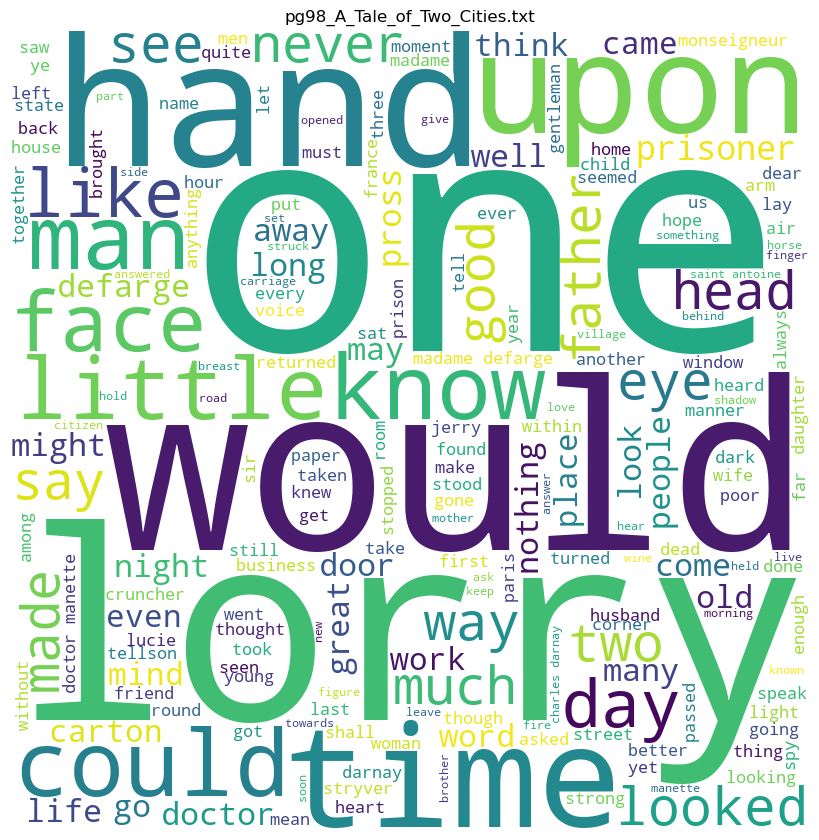

Top 20 Words in pg98_A_Tale_of_Two_Cities.txt:
one: 1.0
lorry: 0.90625
would: 0.8880208333333334
hand: 0.8229166666666666
time: 0.71875
upon: 0.6979166666666666
could: 0.6822916666666666
man: 0.6588541666666666
know: 0.65625
little: 0.6432291666666666
face: 0.5859375
like: 0.5182291666666666
day: 0.5026041666666666
looked: 0.5026041666666666
see: 0.4973958333333333
eye: 0.4921875
father: 0.4895833333333333
way: 0.4869791666666667
two: 0.4817708333333333
much: 0.4713541666666667


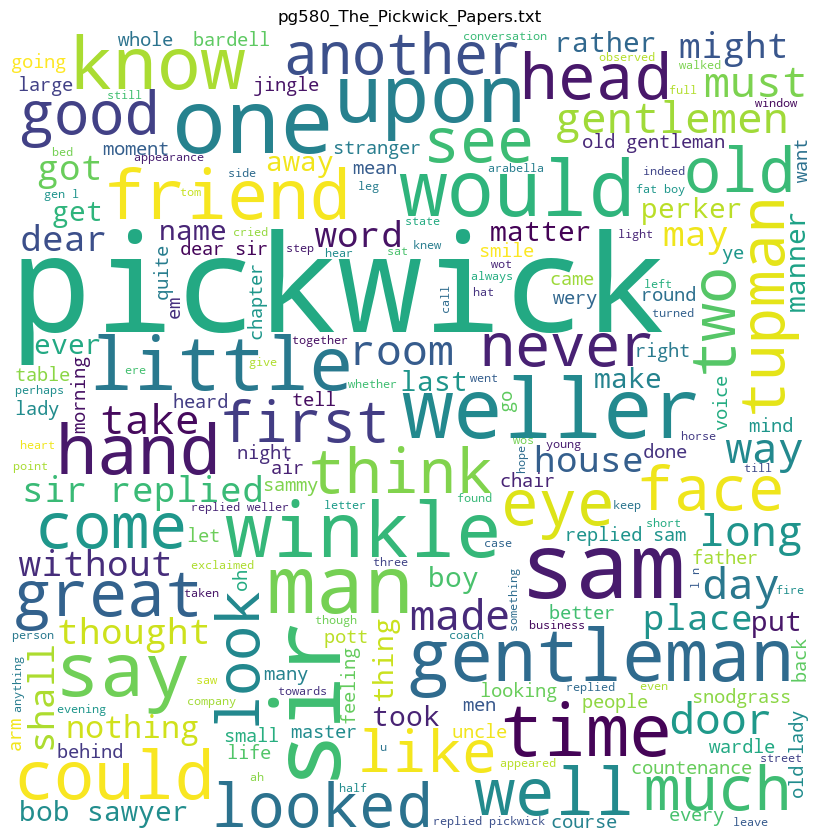

Top 20 Words in pg580_The_Pickwick_Papers.txt:
pickwick: 1.0
sir: 0.4027322404371585
sam: 0.3808743169398907
one: 0.36830601092896176
weller: 0.3103825136612022
man: 0.29890710382513663
upon: 0.2912568306010929
would: 0.27377049180327867
winkle: 0.25792349726775954
say: 0.25081967213114753
little: 0.24699453551912567
know: 0.24043715846994534
gentleman: 0.23333333333333334
time: 0.23278688524590163
friend: 0.21475409836065573
hand: 0.21311475409836064
could: 0.1989071038251366
well: 0.19508196721311474
great: 0.1814207650273224
come: 0.17978142076502732


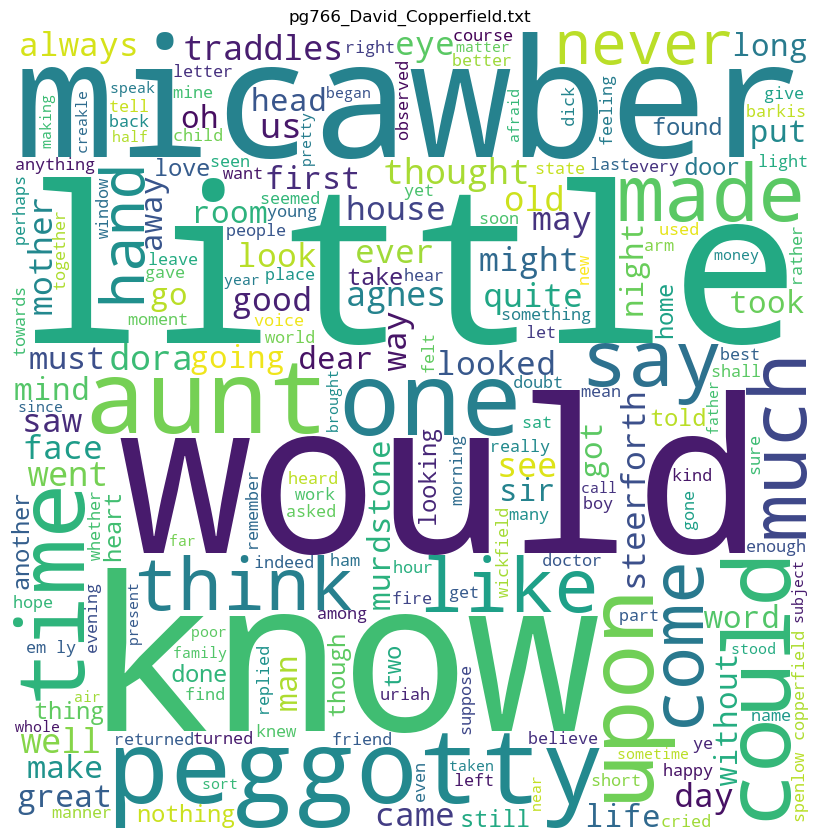

Top 20 Words in pg766_David_Copperfield.txt:
little: 1.0
know: 0.972877358490566
would: 0.9716981132075472
micawber: 0.8950471698113207
peggotty: 0.8891509433962265
aunt: 0.8785377358490566
one: 0.8702830188679245
time: 0.7181603773584906
could: 0.7040094339622641
upon: 0.6957547169811321
made: 0.6875
much: 0.6875
say: 0.6745283018867925
like: 0.6721698113207547
think: 0.6403301886792453
come: 0.6226415094339622
never: 0.5860849056603774
hand: 0.5801886792452831
thought: 0.5766509433962265
dora: 0.5636792452830188


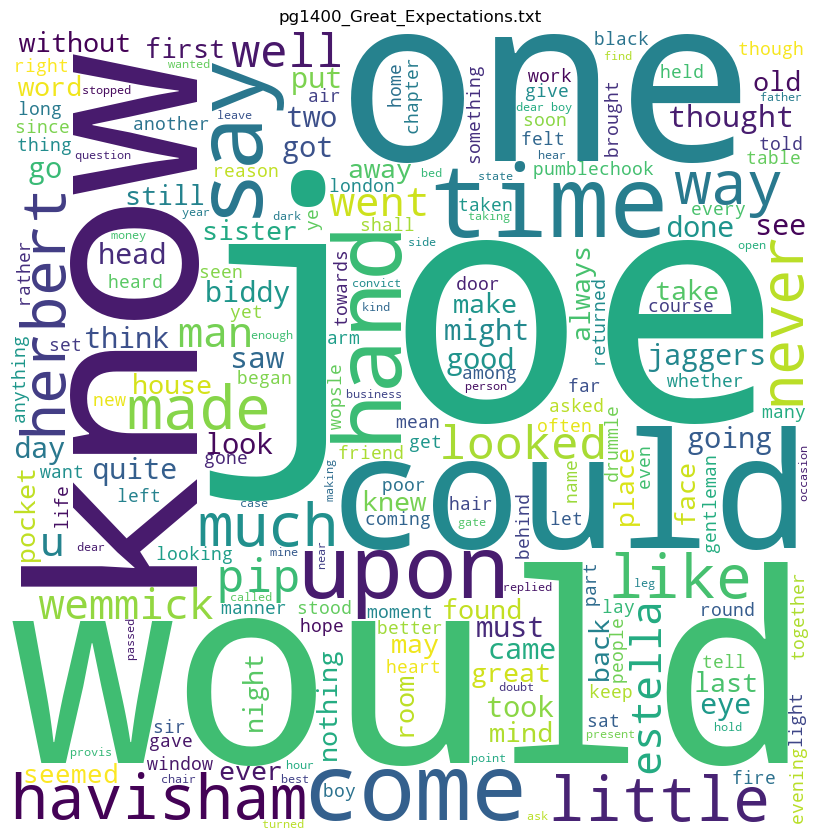

Top 20 Words in pg1400_Great_Expectations.txt:
joe: 1.0
would: 0.7919161676646707
know: 0.5958083832335329
one: 0.5958083832335329
could: 0.5853293413173652
time: 0.5793413173652695
come: 0.5089820359281437
hand: 0.5029940119760479
say: 0.49850299401197606
upon: 0.4880239520958084
havisham: 0.47754491017964074
little: 0.47604790419161674
like: 0.4505988023952096
made: 0.4491017964071856
herbert: 0.4431137724550898
way: 0.43862275449101795
never: 0.4281437125748503
much: 0.42664670658682635
looked: 0.4251497005988024
pip: 0.4161676646706587


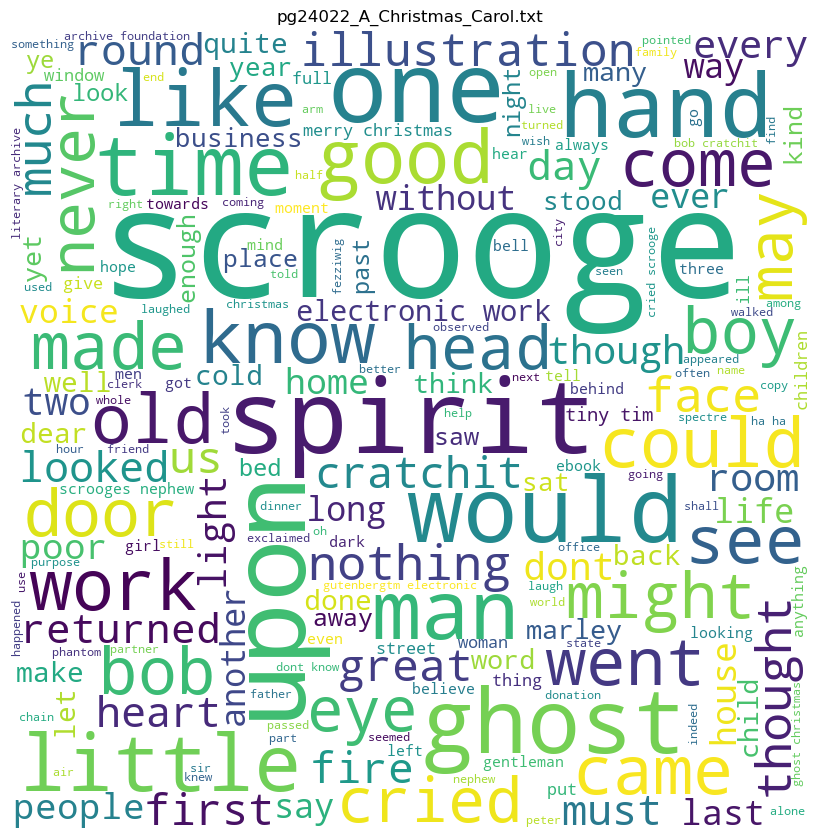

Top 20 Words in pg24022_A_Christmas_Carol.txt:
scrooge: 1.0
upon: 0.369281045751634
spirit: 0.3562091503267974
one: 0.3300653594771242
would: 0.27450980392156865
ghost: 0.26143790849673204
hand: 0.2549019607843137
time: 0.22549019607843138
man: 0.2222222222222222
little: 0.20588235294117646
like: 0.19607843137254902
good: 0.17973856209150327
know: 0.17320261437908496
work: 0.16013071895424835
could: 0.1568627450980392
old: 0.1503267973856209
came: 0.14705882352941177
went: 0.1437908496732026
see: 0.1437908496732026
bob: 0.14052287581699346


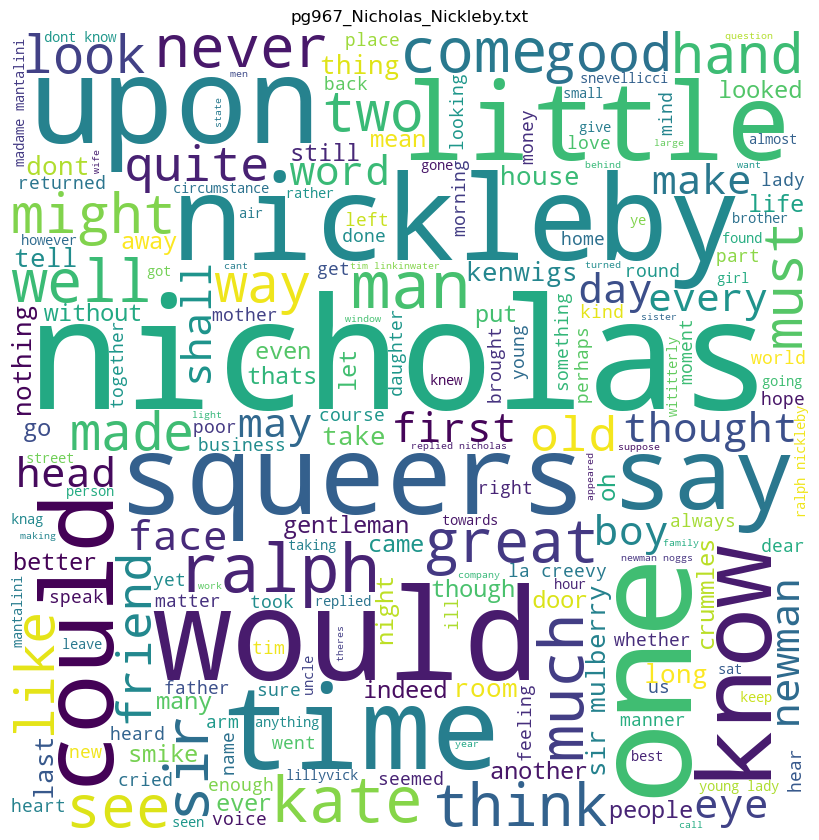

Top 20 Words in pg967_Nicholas_Nickleby.txt:
nicholas: 1.0
one: 0.7771609833465504
would: 0.6701030927835051
upon: 0.6011102299762093
nickleby: 0.5852498017446471
time: 0.5582870737509913
squeers: 0.5122918318794607
little: 0.486122125297383
say: 0.42585249801744646
know: 0.42505947660586835
could: 0.41633624107850914
ralph: 0.4099920697858842
man: 0.39888977002379067
kate: 0.3671689135606661
much: 0.34972244250594764
come: 0.34337827121332276
sir: 0.33068992862807295
great: 0.3251387787470262
think: 0.32434575733544807
well: 0.32355273592386996


In [15]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Define custom stopwords, in addition to the standard English stopwords
stopwords_set = {'mr', 'mrs', 'miss', 'said', '’', '“', '”', 'project', 'gutenberg'}

def preprocess_text_for_wordcloud(text):
    """
    Preprocess the text for word cloud generation:
    - Convert to lowercase
    - Remove punctuation
    - Tokenize
    - Remove stopwords (standard and custom)
    - Return the processed text as a string
    """
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    # Combine standard and custom stopwords
    all_stopwords = set(stopwords.words('english')) | stopwords_set
    # Remove stopwords and custom words
    tokens = [word for word in tokens if word not in all_stopwords]
    return ' '.join(tokens)  # Join the tokens back into a string

# Paths to the text files
file_paths = [
    './6books/pg98_A_Tale_of_Two_Cities.txt', 
    './6books/pg580_The_Pickwick_Papers.txt', 
    './6books/pg766_David_Copperfield.txt', 
    './6books/pg1400_Great_Expectations.txt', 
    './6books/pg24022_A_Christmas_Carol.txt',
    './6books/pg967_Nicholas_Nickleby.txt'
]

# Preprocess texts and store them in a dictionary with filenames as keys
texts = {os.path.basename(path): preprocess_text_for_wordcloud(open(path, 'r', encoding='utf-8').read()) for path in file_paths}

# Generate and display word clouds for each book
for title, text in texts.items():
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set(stopwords.words('english')), min_font_size=10, random_state=101).generate(text)
    
    # Set up the plot configuration
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)  # Display the word cloud
    plt.axis("off")  # Turn off the axis
    plt.tight_layout(pad=0)
    plt.title(title)  # Set the title for each word cloud
    plt.show()  # Display the plot
    
    # Print the top 20 words in the word cloud
    top_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)[:20]
    print(f"Top 20 Words in {title}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")
